# Campus Placement Prediction for MBA Students
#### We have placement data of MBA students in at Jain University Bangalore. We will analyse the recriutment data and create a machine learning model to predict the chances of placement, based on student's academic details, given similar circumstances. 

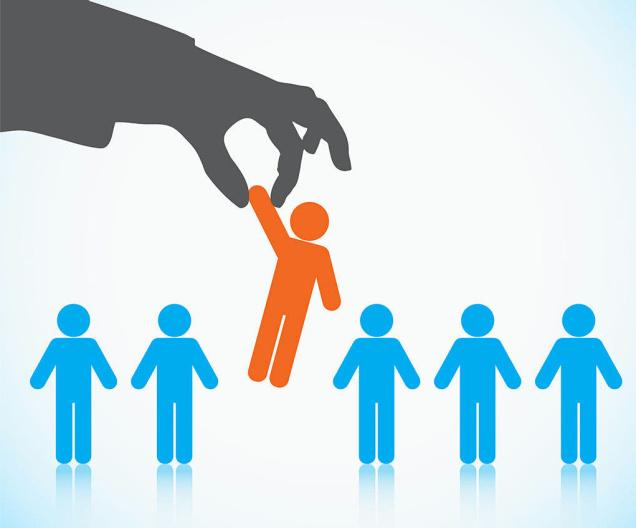

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline

## First Glance at the Data

In [ ]:
df = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

In [ ]:
df.info()

Here we tend to have two target variable. 
1. status - Placed/Not Placed
2. salary 

We are going to deal with, the status target i.e Placement Status. 

In [ ]:
df1 = df.drop(columns=['salary','sl_no'], axis=1)

In [ ]:
dummy = pd.get_dummies(df['status'])
dummy.drop(columns=['Not Placed'],axis=1, inplace=True)
df1 = pd.concat([df1,dummy],axis =1)
df1.head()

## Features Analysis

In [ ]:
df1['Placed'].value_counts().to_frame().style.bar()

We will first get the correlation heat map. 

In [ ]:
ax = sns.heatmap(df1.corr(),annot=True)

#### Observations- 
ssc_p, hsc_p and degree_p are more correlated, while etest_p and mba_p are least related. 
**MBA percentage matters least for your placement as a MBA student, which is quite surprising.**

### GENDER

In [ ]:
g = sns.factorplot(x="gender",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

Unfortuantely Females have slighly less probablity of getting the college placement then males, in this college. However such neglible variations can often be ignored.

## School Boards

#### These school boards have negligible effect or correlation, with placement of the student. 

### Senior School Board

In [ ]:
g = sns.factorplot(x="ssc_b",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

### High School Board

In [ ]:
g = sns.factorplot(x="hsc_b",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

### High School Subject

In [ ]:
g = sns.factorplot(x="hsc_s",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

#### Science and commerece student have almost equal chances of placement, however for a arts student placement is less likely. 

### Subject Bachelor Degree

In [ ]:
g = sns.factorplot(x="degree_t",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

The plausibility of placement is high, for Sci/Tech and Comm/Magmt student, while low for other degrees

### Work Experience

In [ ]:
g = sns.factorplot(x="workex",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

Obviouly a work experience gives more chances of placement. 

### Specialization

In [ ]:
g = sns.factorplot(x="specialisation",y="Placed",data= df1,kind="bar", size = 6)
g.despine(left=True)
g = g.set_ylabels("placement probability")

For placement Finance is more sutable than HR

### Secondary School Marks 

Students with better marks in secondary schools have more placement chances.

In [ ]:
g = sns.kdeplot(df1["ssc_p"][(df1["Placed"] == 0) & (df1["ssc_p"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df1["ssc_p"][(df1["Placed"] == 1) & (df1["ssc_p"].notnull())], color="Blue", shade = True)
g.set_xlabel("Marks in secondary school")
g.set_ylabel("Placement")
g = g.legend(["Not Placed","Placed"])

### High School Percentage

In [ ]:
g = sns.kdeplot(df1["hsc_p"][(df1["Placed"] == 0) & (df1["hsc_p"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df1["hsc_p"][(df1["Placed"] == 1) & (df1["hsc_p"].notnull())], color="Blue", shade = True)
g.set_xlabel("Marks in high school")
g.set_ylabel("Placement")
g = g.legend(["Not Placed","Placed"])

### Degree Percentage

In [ ]:
g = sns.kdeplot(df1["degree_p"][(df1["Placed"] == 0) & (df1["degree_p"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df1["degree_p"][(df1["Placed"] == 1) & (df1["degree_p"].notnull())], color="Blue", shade = True)
g.set_xlabel("Marks in secondary school")
g.set_ylabel("Placement")
g = g.legend(["Not Placed","Placed"])

In [ ]:
g = sns.catplot(x="Placed",y= 'degree_p', order=[0, 1],data=df1)

Having more than 50% marks is important to get a placement. 

### Employability test percentage

In [ ]:
g = sns.kdeplot(df1["etest_p"][(df1["Placed"] == 0) & (df1["etest_p"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df1["etest_p"][(df1["Placed"] == 1) & (df1["etest_p"].notnull())], color="Blue", shade = True)
g.set_xlabel("Marks in secondary school")
g.set_ylabel("Placement")
g = g.legend(["Not Placed","Placed"])

In [ ]:
g = sns.catplot(x="Placed",y= 'etest_p', order=[0, 1],data=df1)

#### Placement doesn't seeem to much affected by Etest, however large number of student with 60-70% seem to be unplaced. So if you are a MBA student at this college focus less on Etest.

### MBA Percentage

In [ ]:
g = sns.kdeplot(df1["mba_p"][(df1["Placed"] == 0) & (df1["mba_p"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df1["mba_p"][(df1["Placed"] == 1) & (df1["mba_p"].notnull())], color="Blue", shade = True)
g.set_xlabel("Marks in secondary school")
g.set_ylabel("Placement")
g = g.legend(["Not Placed","Placed"])

MBA percentatges also don't show much relation with placement values

In [ ]:
g = sns.catplot(x="Placed",y= 'mba_p', order=[0, 1],data=df1)

After overall analysis, the significant features are: 
1. ssc_p
2. hsc_p 
3. degree_p
4. Specialization
5. Workex
6. degree_t - other vs science/commmerce
7. hsc_s - arts vs other categories
8. gender

In [ ]:
df1.head()

## Feature Engineering

Here, we need a dataset to train models. Hence all the object and categorical data will have to transformed.

In [ ]:
df_feature = df1[['ssc_p','hsc_p','degree_p']]

In [ ]:
df1["workex"] = df1["workex"].astype('category')
df_feature["workex"] = df1["workex"].cat.codes
#No=0, Yes=1

In [ ]:
df1["specialisation"] = df1["specialisation"].astype('category')
df_feature["specialisation"] = df1["specialisation"].cat.codes
# Mkt&Fin=0 | Mkt&HR=1 

In [ ]:
df1["gender"] = df1["gender"].astype('category')
df_feature["gender"] = df1["gender"].cat.codes
# F=0 | M=1 

In [ ]:
hsc_dummy = pd.get_dummies(df1['hsc_s'], prefix='hsc')
df_feature = pd.concat([df_feature,hsc_dummy['hsc_Arts']],axis =1)
#hsc_Arts - Yes=1, No=0

In [ ]:
deg_dummy = pd.get_dummies(df1['degree_t'], prefix='degree_in')
df_feature = pd.concat([df_feature,deg_dummy['degree_in_Others']],axis =1)
#degree_in_other - Yes=1, No=0

In [ ]:
df_feature.head()

## Features Mapping

> 
> 0. **Categories**       - 0  |  1
> 1. **workex**           - N  |  Y
> 2. **specialisation**   - N  |  Y
> 3. **gender**           - F  |  M
> 4. **hsc_Arts**         - N  |  Y
> 5. **degree_in_Others** - N  |  Y
> 

In [ ]:
df_feature.dtypes

### Normalization
The three percentage variables are needed to be normalized.  

In [ ]:
df_feature['ssc_p'] = df_feature['ssc_p']/df_feature['ssc_p'].max()
df_feature['hsc_p'] = df_feature['hsc_p']/df_feature['hsc_p'].max()
df_feature['degree_p'] = df_feature['degree_p']/df_feature['degree_p'].max()

In [ ]:
df_feature.head()

### Correlation Heatmap Of All Features
After the final feature engineering, the heat 

In [ ]:
df_feature['Placed'] = df1['Placed']
ax = sns.heatmap(df_feature.corr(),annot=True)
df_feature.drop(columns='Placed',axis=1,inplace=True)

#### Since Gender and hsc_Arts features show very less coorelation, they can be removed to avoid any biasness in the model.

In [ ]:
df_feature.drop(columns=['gender','hsc_Arts'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


## Logistic Regression Model
By applying a simple linear regression model, one can understand the predictability of the data. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feature,df1['Placed'],test_size = 0.1,random_state=5)

In [ ]:
clsf = LogisticRegression(C=3)
clsf.fit(X_train, y_train)
score = clsf.score(X_test,y_test)
print (score)

In [ ]:
print(cross_val_score(clsf, df_feature, df1['Placed'], cv=10))
print (cross_val_score(clsf, df_feature, df1['Placed'], cv=10).mean())

In [ ]:
accuracy = []
skf = StratifiedKFold(n_splits = 10,random_state=2)
score = cross_val_score(clsf, X_train, y = y_train, scoring = "accuracy", cv = skf, n_jobs=4)
print (score)

## Cross Validation Of Models
#### Modeling different classifiers gives an idea about more suitable algorithms to be used. Here about seven famous classifiers are used. 
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Multi Layer Perceptron
5. Support Vector Classifier 
6. Extra Tree Classifier
7. KNeighbor

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
kfold = StratifiedKFold(n_splits = 10,random_state=2)
classifiers =[]
r=2

classifiers.append(LogisticRegression(random_state=r))
classifiers.append(DecisionTreeClassifier(random_state=r))
classifiers.append(MLPClassifier(random_state=r))
classifiers.append(RandomForestClassifier(random_state=r))
classifiers.append(AdaBoostClassifier(RandomForestClassifier(random_state=r),random_state=r,learning_rate=0.1))
classifiers.append(ExtraTreesClassifier(random_state=r))
classifiers.append(GradientBoostingClassifier(random_state=r))
classifiers.append(SVC(random_state=r))
classifiers.append(KNeighborsClassifier())

In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","DecisionTree","MultipleLayerPerceptron",
                                                                                       "RandomForest","Adaboost","ExtraTree","GradientBoosting","SVC","KNeighboors"]})
cv_res.head()

In [ ]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### The best performance can be shown by Adaboosted Random Forest Classifier. This may be the most suitable algorithm. 

# HyperParamter Tuning

## According to the cross validation score, best suitable algorithms are:
1. RandomForests
2. Adaboost With Random Forest
3. Extra Tree 
4. KNeighbor
4. Gradient Boosting

In [ ]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
adaRFC = AdaBoostClassifier(RFC_best, random_state=7)

ada_param_grid = {"algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaRFC = GridSearchCV(adaRFC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaRFC.fit(X_train,y_train)
adaRFC_best = gsadaRFC.best_estimator_
gsadaRFC.best_score_

In [ ]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

In [ ]:
KNC = KNeighborsClassifier()
kn_param_grid = {'n_neighbors':[4,5,6,7,8,9],
                 'weights':["uniform", "distance"],
                 'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
                 'metric':['euclidean','manhattan']
                }

gsKNC = GridSearchCV(KNC, param_grid= kn_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)

gsKNC.fit(X_train,y_train)

KNC_best = gsKNC.best_estimator_
gsKNC.best_score_

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

### Plotting The Learning Curve

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

In [ ]:
X = df_feature
y = df1['Placed']
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaRFC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsKNC.best_estimator_,"KNeighbor learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)

The training accuracy of KNeighbor and GradientBoosting model are decreasing with increasing data, hence won't be anymore effective on the data. 
The Random Forest Classification Model gives good accuracy, but Adaboost Classifier is slighly better than RFC. 

# Importance Of Features 

Understanding the feature importance on each classifier is helpful to understand data. For a student to be placed, she must have good marks in secondary school, above average degree percentage and high school marks are also important. 

In [ ]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(21,7))

names_classifiers = [("AdaBoosting", adaRFC_best),("RandomForest",RFC_best),("ExtraTrees",ExtC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:6]
        # [:6] is mentioned as there are only six feature, while the function can return more indexs than the feature. 
        print (name,indices)
        x_ =  classifier.feature_importances_[indices][:6]
        if name == "GradientBoosting": 
            print (x_)
        g = sns.barplot(y=X_train.columns[indices][:6],x = x_ , orient='h',ax=axes[col])

        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

# Final Prediction Model

#### Adaboost on Random Forest is the most accurate accurate classfier over other classifier. This model would provide better accuracy given more data. 

In [ ]:
g = plot_learning_curve(gsadaRFC.best_estimator_,"Adaboost RFC learning curves",X_train,y_train,cv=kfold)
print ("Score of the model",adaRFC_best.score(X,y))

### Prediction 

In [ ]:
Placement_predict = pd.Series(adaRFC_best.predict(X), name="Survived")

Pridiction = pd.concat([df[sl_no],Placement_predict],axis=1)

results.to_csv("python_ensemble_prediction.csv",index=False)